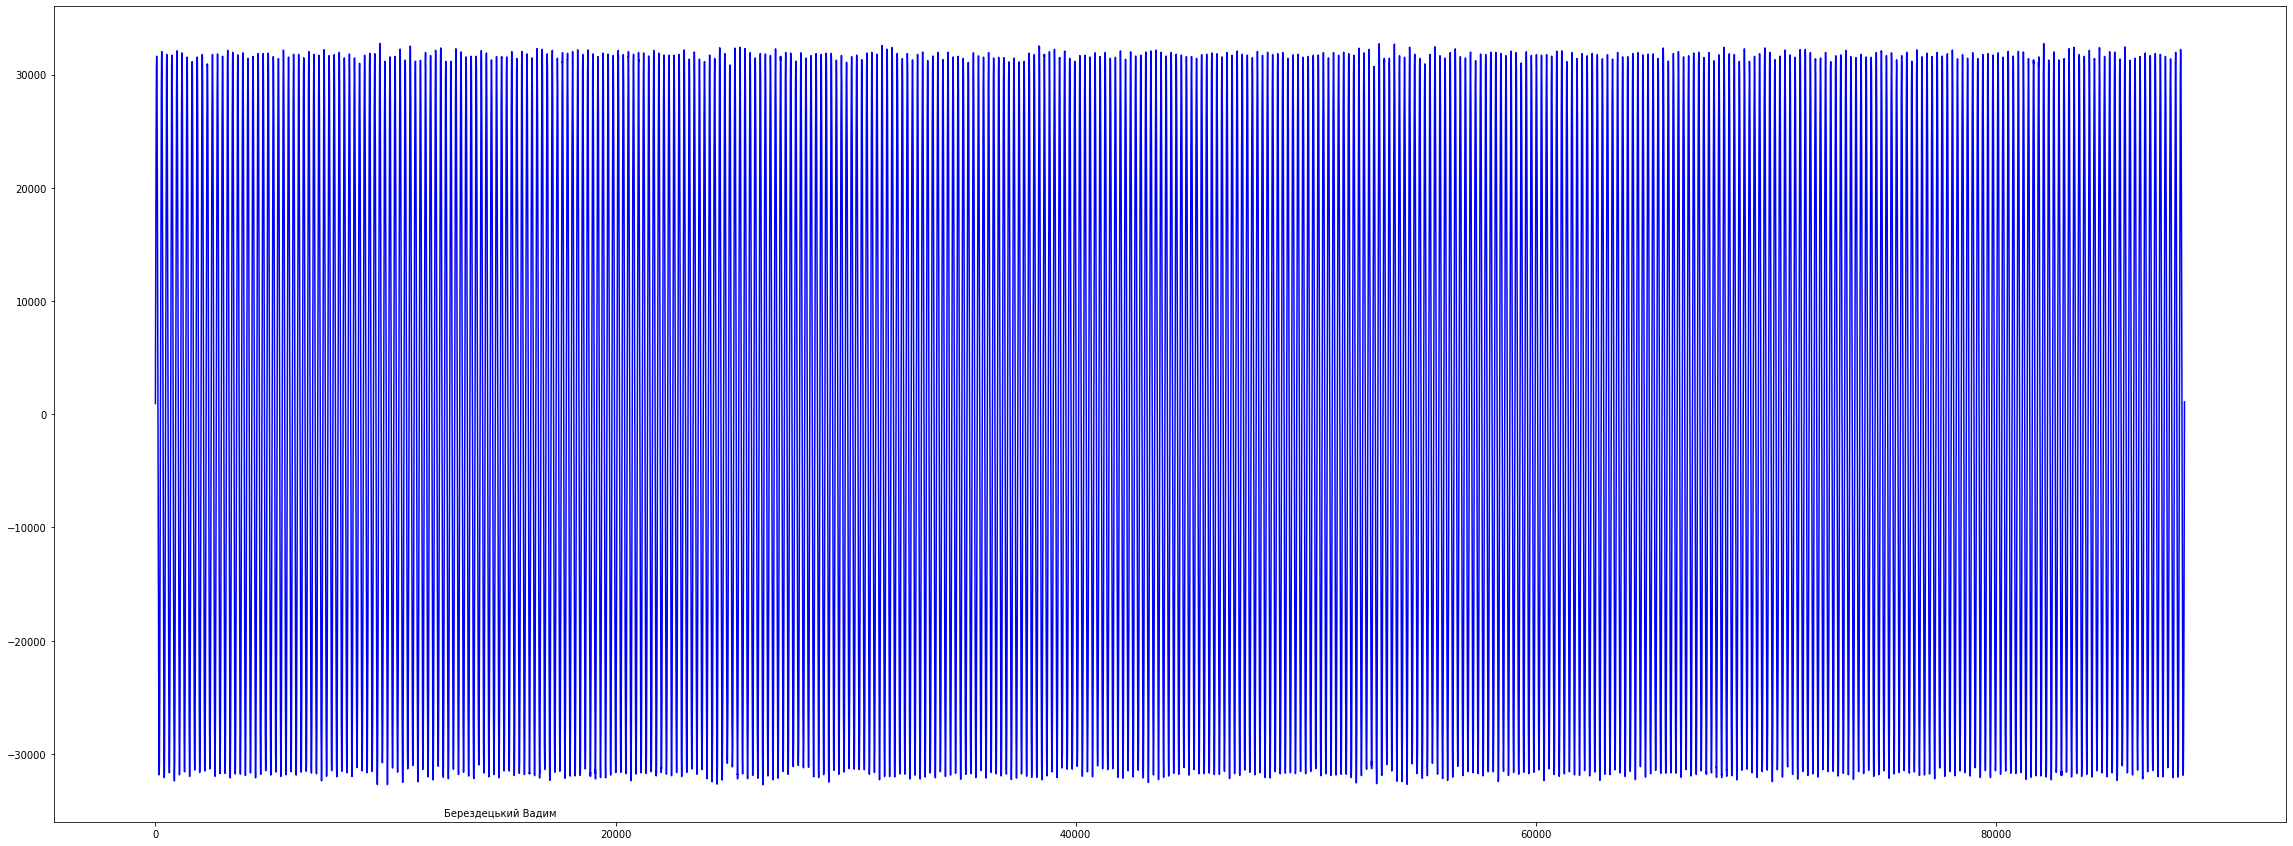

In [179]:
from scipy.io import wavfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

samplerate, data = wavfile.read('./data.wav')

df = pd.Series(data)

ax = plt.gca()
plt.plot(range(df.size), df, c='blue')
plt.text(0.2, 0.01, 'Берездецький Вадим', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
plt.show()

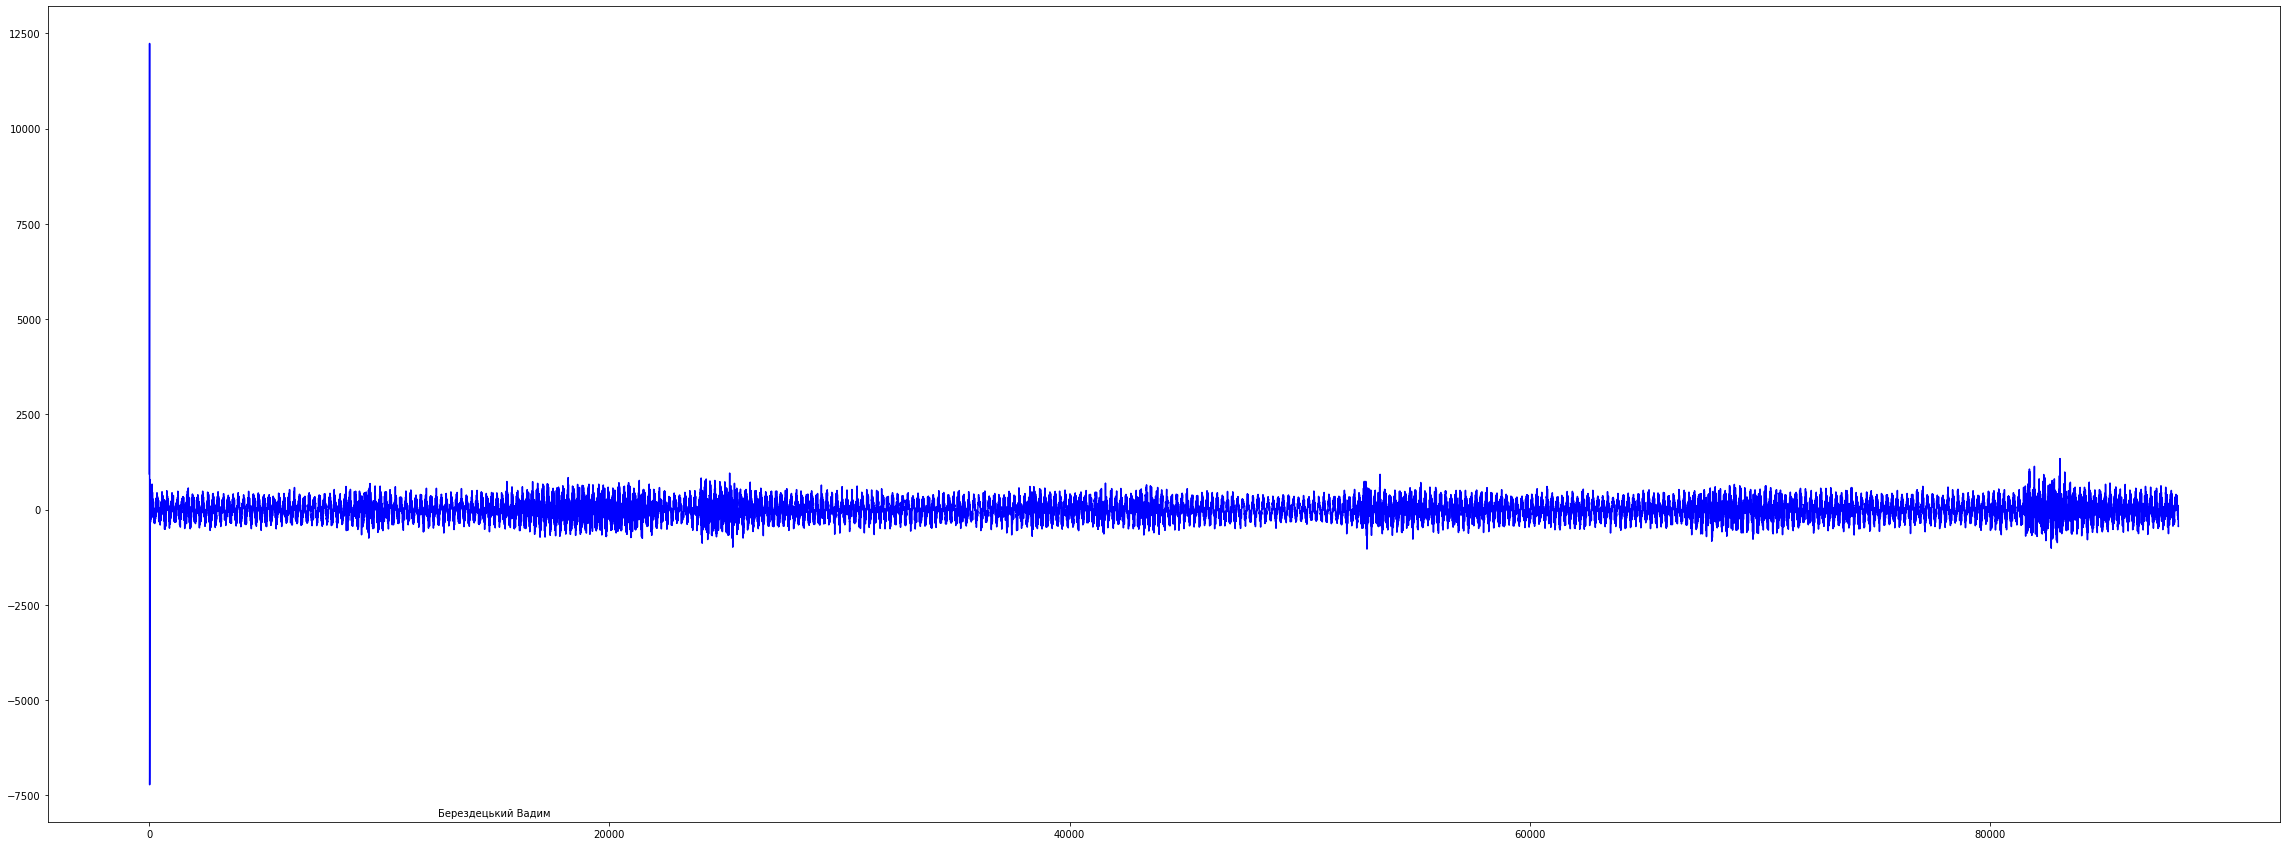

In [180]:
rollingWindow = 15

def noiseReduction(iters, data):
  if iters == 0:
    return data
  else:
    result = data.subtract(data.rolling(window=rollingWindow).mean().fillna(0))
    return noiseReduction(iters - 1, result)

result = noiseReduction(3, df)

ax = plt.gca()
plt.plot(range(result.size), result, c='blue')
plt.text(0.2, 0.01, 'Берездецький Вадим', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
plt.show()

In [181]:
# save file
wavfile.write('result_{window}.wav'.format(window=rollingWindow), samplerate, result.to_numpy().astype(np.int16))